

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset comes from IMDB and contains information around 10,800 movies collected from The Movie Database (TMDb), including user
ratings, revenue, runtime and budget.
In this project, we'll be answering the following questions:
Which genres are most popular from year to year?
What kinds of properties are associated with movies that are succesful(revenue>budget)?


In [305]:

import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling





In [306]:
#loading data and inspecting
df =pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [307]:

df.shape

(10866, 21)

In [308]:
#checking column infos, null values, dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [309]:
#inspecting data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f850df2ba20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f850e91da20>]], dtype=object)

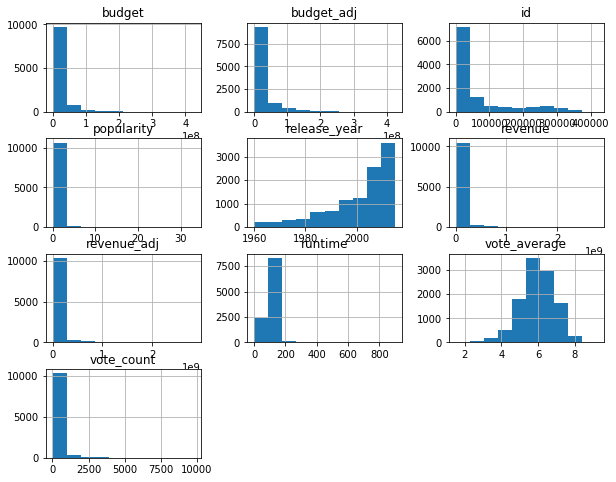

In [310]:
#drawing plots to visualize data
df.hist(figsize=(10,8))

In [311]:
#seeing the unique values in each column
#since many columns have '|' separated values number of unique values are too many in some columns
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# Removing unwanted columns
Removing id,imdb_id since we already have index,homepage,tagline,keywords,overview,cast,director,title,production companies since those are very specific to the movies or they are not required to answer our questions <br/>
we can see that there are two column which represent revenue and budget i.e revenue & revenue_adj and budget & budget_adj.Keeping the adjusted values.<br />
Removing release date since we already have release year which is enough to find the answers to our above questions

In [313]:
df.drop({'id','imdb_id','homepage','tagline','keywords', 'overview','cast','director','budget','revenue','production_companies','original_title' },inplace=True,axis=1)


### Data Cleaning (Replace this with more specific notes!)

In [314]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity      10866 non-null float64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


In [316]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Here we can see that runtime, revenue_adj and budget_adj have 0 values so replacing them with the mean

In [317]:
df.query("revenue_adj>0").revenue_adj.mean()

115077354.86800517

In [318]:
df["revenue_adj"]=df.revenue_adj.replace(0,115100887.62834093)

In [319]:
df.query("budget_adj>0").budget_adj.mean()

36887736.695452176

In [320]:
df['budget_adj']= df["budget_adj"].replace(0,36896201.747996517)

In [321]:
df.query("runtime>0").runtime.mean()

102.36289801568989

In [322]:
df["runtime"]= df["runtime"].replace(0,102.42184609692934)

# Checking for duplicates and removing if any

In [323]:
df.duplicated().sum()

1

In [324]:
df.drop_duplicates(inplace=True)

# Check for null values

In [325]:
df.isnull().sum()

popularity       0
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

dropping null genres

In [326]:
df.dropna(inplace=True)

In [327]:
df.isnull().sum()

popularity      0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

# Checking datatypes

In [328]:
df.dtypes

popularity      float64
runtime         float64
genres           object
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

In [329]:
df['release_date']=pd.to_datetime( df['release_date'])

In [330]:
df.head()

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year)

### In order to find which genres were popular over the years, the fields we can use are popularity,release_year and genres.We can drop rest of the columns and save it in a new dataset df_1. Genres have more than 1 values in its column. Taking care of those.

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
popularity      10842 non-null float64
runtime         10842 non-null float64
genres          10842 non-null object
release_date    10842 non-null datetime64[ns]
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
budget_adj      10842 non-null float64
revenue_adj     10842 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 847.0+ KB


In [332]:
df_1= df.drop({'budget_adj','revenue_adj','runtime','release_date','vote_count','vote_average'},axis=1)
df_1.head()

,popularity,genres,release_year
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,Adventure|Science Fiction|Thriller,2015
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,Action|Crime|Thriller,2015


In [333]:
df_1=df_1.join(df_1.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genre')).reset_index(drop=True)

In [334]:
df_1.head()

,popularity,genres,release_year,genre
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Action
1,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Adventure
2,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Science Fiction
3,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Thriller
4,28.419936,Action|Adventure|Science Fiction|Thriller,2015,Action


In [335]:
#finding the sum of popularity for each genre for each year
genre_popularity_year_wise= df_1.groupby(['release_year','genre']).popularity.agg({'popularity': 'sum'}).reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [336]:
genre_popularity_year_wise.head()

,release_year,genre,popularity
0,1960,Action,4.725796
1,1960,Adventure,3.504904
2,1960,Comedy,3.168003
3,1960,Crime,0.692959
4,1960,Drama,7.361967


In [337]:
#finding the most popular genre in each year
most_popular_genre_each_year=genre_popularity_year_wise[genre_popularity_year_wise.groupby('release_year').popularity.transform(max) == genre_popularity_year_wise.popularity][['genre','release_year','popularity']].reset_index(drop=True)

In [338]:
most_popular_genre_each_year.head()

,genre,release_year,popularity
0,Drama,1960,7.361967
1,Drama,1961,6.915731
2,Drama,1962,8.232008
3,Thriller,1963,7.199292
4,Comedy,1964,7.859657


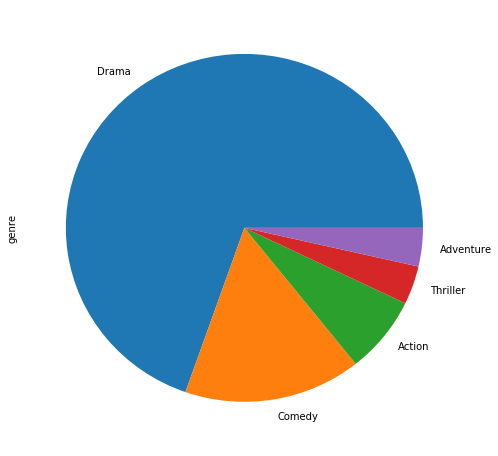

In [339]:
#seeing the most popular genres over the years


most_popular_genre_each_year.genre.value_counts().plot(kind='pie',figsize=(8,8))

### Research Question 2  ( What factors are associated with movies being succesful)

In [340]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.head(1)

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [341]:
#creating new column success i.e. revenue/budget
df['success']=df['revenue_adj']/df['budget_adj']

In [342]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,success
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04,1.084200e+04
mean,0.647461,102.421846,217.823649,5.974064,2001.314794,3.689620e+07,1.151009e+08,4.061144e+04
std,1.001032,30.828619,576.180993,0.934257,12.813617,2.896940e+07,1.329795e+08,1.715111e+06
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,2.400000e-07
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,2.445229e+07,5.840647e+07,1.909095e+00
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,3.689620e+07,1.151009e+08,3.119586e+00
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,3.689620e+07,1.151009e+08,3.119586e+00
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,1.249615e+08


####  Checking the movies which were not successful i.e. revenue <budget or success field <1

##### Creating mask for success and failed movies  ####

In [343]:
failed=df["success"]<1

In [344]:
success=df["success"]>=1

### Checking the number of failed and succesful movies

In [345]:
failed.sum()

1830

In [346]:
success.sum()

9012

In [347]:
df.shape

(10842, 10)

## Comparing the budgets

In [348]:
df.head()

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,success
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192
1,28.419936,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.522909
2,13.112507,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,2.683984
3,11.173104,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,10.340891
4,9.335014,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,7.927628


In [349]:
df.budget_adj[failed].mean()

36518475.348517604

In [350]:
df.budget_adj[success].mean()

36972903.846425988

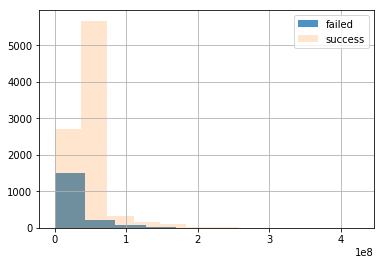

In [351]:
df.budget_adj[failed].hist(label='failed',alpha=0.8,bins=10)
df.budget_adj[success].hist(label='success',alpha=0.2,bins=10);
plt.legend()

### As we can see, there is no much difference between mean budget of successful and failed movies. But since the graph with success is more skewed to the right we can see that movies with higher budget are lot more succesful and compared with the lower budget movies.  

## Comparing the vote average

In [352]:
df.head()

,popularity,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,success
0,32.985763,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10.090192
1,28.419936,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.522909
2,13.112507,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,2.683984
3,11.173104,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,10.340891
4,9.335014,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,7.927628


In [353]:
df.vote_average[failed].mean()

5.9314207650273225

In [354]:
df.vote_average[success].mean()

5.9827230359520644

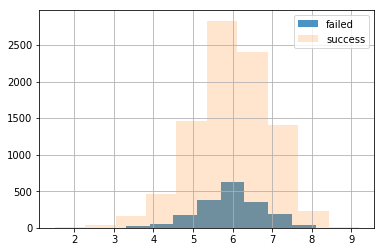

In [355]:
df.vote_average[failed].hist(label='failed',alpha=0.8,bins=10)
df.vote_average[success].hist(label='success',alpha=0.2,bins=10);
plt.legend()

### As we can see here the ratings of the movie does not have to do much with the success.

## Comparing the Popularity

In [356]:
df.popularity[failed].mean()

0.54840699726775943

In [357]:
df.popularity[success].mean()

0.66757466999556136

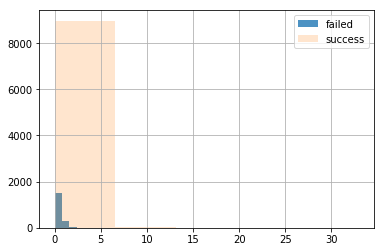

In [358]:
df.popularity[failed].hist(label='failed',alpha=0.8,bins=5)
df.popularity[success].hist(label='success',alpha=0.2,bins=5);
plt.legend()

### As we can see here higher the  popularity movies have more chances of being succesful.

<a id='conclusions'></a>
## Conclusions



### From our analysis, we can conclude that
### -drama has been distantly the most popular genre over the years followed by comedy and action
### -Vote Average didn't have much effect on success of the film
### -More popular movies and movies with higher budget have more chance of being successful

# Limitations
### We filled the rows with 0 revenue, budget and runtime with the mean values.




In [360]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0